<a href="https://colab.research.google.com/github/rafa-fortes/Estat-stica-_para-_Ci-ncia-_de-_Dados_e_Machine_Learning/blob/main/Classifica%C3%A7%C3%A3o_com_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação com dados desbalanceados

## Carregamento da base de dados

In [8]:
import pandas as pd
import random
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [9]:
dataset = pd.read_csv('/content/sample_data/credit_data.csv')

In [10]:
dataset.shape

(2000, 5)

In [11]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [12]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

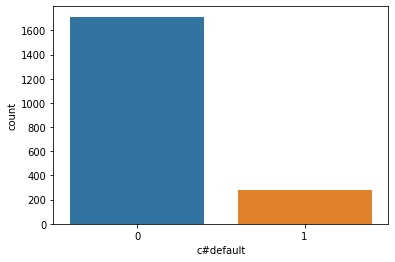

In [13]:
import seaborn as sns
sns.countplot(x=dataset['c#default']);

In [14]:
X = dataset.iloc[:, 1:4].values

In [15]:
X.shape

(1997, 3)

In [16]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [17]:
y = dataset.iloc[:, 4].values

In [18]:
y.shape

(1997,)

In [19]:
y

array([0, 0, 0, ..., 1, 0, 0])

## Base de treinamento e teste

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, stratify = y)

In [22]:
X_treinamento.shape, y_treinamento.shape

((1597, 3), (1597,))

In [23]:
X_teste.shape, y_teste.shape

((400, 3), (400,))

In [24]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [25]:
1714 / len(dataset), 283 / len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [26]:
np.unique(y_treinamento, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [27]:
226 / len(y_treinamento)

0.14151534126487164

In [28]:
np.unique(y_teste, return_counts=True)

(array([0, 1]), array([343,  57]))

In [29]:
57 / len(y_teste)

0.1425

## Classificação com Naïve Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
previsoes = modelo.predict(X_teste)

In [33]:
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [34]:
y_teste

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(previsoes, y_teste)

0.9275

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
cm = confusion_matrix(previsoes, y_teste)
cm

array([[339,  25],
       [  4,  32]])

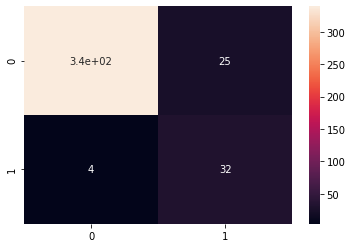

In [39]:
sns.heatmap(cm, annot=True);

In [40]:
(336 + 32) / (336 + 25 + 7 + 32)

0.92

In [41]:
# Percentual de acerto para pessoas que pagam o empréstimo
336 / (336 + 25)

0.9307479224376731

In [42]:
# Percentual de acerto para pessoas que não pagam o empréstimo
32 / (32 + 7)

0.8205128205128205

In [43]:
# Perdas: 5.000
# Clientes não pagadores: 1.000
1000 * 18 / 100

180.0

In [44]:
180 * 5000 

900000

## Subamostragem (undersampling) - Tomek links

- https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html

In [45]:
from imblearn.under_sampling import TomekLinks

In [46]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_sample(X, y)

In [47]:
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [48]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [49]:
np.unique(y_under, return_counts=True)

(array([0, 1]), array([1614,  283]))

In [50]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under,
                                                                          y_under,
                                                                          test_size=0.2,
                                                                          stratify=y_under)
X_treinamento_u.shape, X_teste_u.shape

((1517, 3), (380, 3))

In [51]:
modelo_u = GaussianNB()
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(previsoes_u, y_teste_u)

0.9289473684210526

In [52]:
cm_u = confusion_matrix(previsoes_u, y_teste_u)
cm_u

array([[315,  19],
       [  8,  38]])

In [53]:
315 / (315 + 26)

0.9237536656891495

In [54]:
31 / (31 + 8)

0.7948717948717948

## Sobreamostragem (oversampling) - SMOTE

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_sample(X, y)

In [57]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [58]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [59]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([1714, 1714]))

In [60]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over,
                                                                          test_size = 0.2,
                                                                          stratify=y_over)

In [61]:
X_treinamento_o.shape, X_teste_o.shape

((2742, 3), (686, 3))

In [62]:
modelo_o = GaussianNB()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(previsoes_o, y_teste_o)

0.8892128279883382

In [63]:
cm_o = confusion_matrix(previsoes_o, y_teste_o)
cm_o

array([[298,  31],
       [ 45, 312]])

In [64]:
305 / (305 + 19)

0.941358024691358

In [65]:
324 / (324 + 38)

0.8950276243093923

In [66]:
# Perdas: 5.000
# Cliente não pagadores: 1.000
1000 * 11 / 100

110.0

In [67]:
110 * 5000

550000

In [68]:
900000 - 550000

350000

# Sobreamostragem(oversampling) - SMOTE

In [70]:
from imblearn.over_sampling import SMOTE

In [73]:
smote = SMOTE(ratio='minorit')

In [74]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [75]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [77]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([1714, 1714]))

In [80]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over,
                                                                          test_size = 0.2,
                                                                          stratify=y_over)

In [81]:
X_treinamento_o.shape, X_teste_o.shape

((2742, 3), (686, 3))

In [84]:
modelo_o = GaussianNB()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(previsoes_o, y_teste_o)

0.9037900874635568

In [85]:
cm_o = confusion_matrix(previsoes_o, y_teste_o)
cm_o

array([[291,  14],
       [ 52, 329]])

In [86]:
291 / (291 + 14)

0.9540983606557377

In [87]:
329 / (329 + 52)

0.863517060367454

In [88]:
# Perda: 5.000
#Clientes não pagadores: 1.000
1000 * 11 / 100

110.0

In [89]:
110 * 5000

550000

In [91]:
#conseguimos diminuir o prejuízo do banco em 
900000 - 550000

350000